**2.1 The data set description**

In [45]:
import pandas as pd
bankrupt = pd.read_csv("data/lab2-alldata/bankrupt.txt", sep=",")

In [46]:
# 2. A megfigyelések (sorok) és a változók (oszlopok) száma
print(bankrupt.shape) # A shape tulajdonság két értéket ad vissza: (sorok, oszlopok)
# Ez azt jelenti, hogy 6819 vállalatról van adatunk és 96 pénzügyi mutató található.

(6819, 96)


In [47]:
# 3. Calculating descriptive statistics
# --------------------------------------------------------------------
# The describe() function calculates the mean, standard deviation (szórás), minimum,
# quartiles, and maximum for all numeric variables.

stats = bankrupt.describe()
print(stats)

         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                          

From the describe() results, we can see that some variables (for example, “Total assets to GNP price”) have much larger values than others, which are mostly between 0 and 1.
This shows that there are big differences in the scale of the variables.
Because most classification algorithms are sensitive to such differences, it is important to standardize the data before building the model.
Standardization makes sure that all variables have a similar scale and the same importance in the learning process.

In [48]:
# Check the column names in the DataFrame
# This helps us ensure that we are using the correct column name for the target variable.
print(bankrupt.columns)

# Count the number of companies for each bankruptcy status
# 'Bankrupt?' is the target variable:
# 0 = company did NOT go bankrupt
# 1 = company went bankrupt
# value_counts() returns the count of each unique value in the column.
counts = bankrupt['Bankrupt?'].value_counts()
print("Counts of companies by bankruptcy status:")
print(counts)

# Calculate the percentage of companies for each bankruptcy status
# By setting normalize=True, value_counts() returns proportions instead of raw counts.
# Multiplying by 100 converts them into percentages.
percent = bankrupt['Bankrupt?'].value_counts(normalize=True) * 100
print("\nPercentage of companies by bankruptcy status:")
print(percent)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

The data set is imbalanced (kiegyensúlyozatlan), since the number of bankrupt companies (csődbe ment cégek) is much smaller than the number of non-bankrupt ones (nem csődbe ment cégek).
This is important because most classification algorithms (osztályozási algoritmusok) may become biased toward the majority class (elfogulttá válhatnak a gyakoribb kategória felé), which can lead to poor prediction of bankrupt companies.
To fix this, techniques such as resampling (újrakeverés / újramintavételezés) or class weighting (osztály súlyozás) can be used.

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Importing the datasets
# -------------------------------------------------------------
# The first column contains row labels (index),
# so we set index_col=0 , (means the first coloumn is just index) to import the data correctly.
x_train = pd.read_csv("data/lab2-alldata/x_train.csv", index_col=0)
x_test = pd.read_csv("data/lab2-alldata/x_test.csv", index_col=0)
y_train = pd.read_csv("data/lab2-alldata/y_train.csv", index_col=0)
y_test = pd.read_csv("data/lab2-alldata/y_test.csv", index_col=0)

# 2. Check the number of observations in each dataset
# -------------------------------------------------------------
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# 3. Check class distribution in training and test sets
# -------------------------------------------------------------
print("\nClass distribution in y_train:")
print(y_train['Bankrupt'].value_counts(normalize=True) * 100)

print("\nClass distribution in y_test:")
print(y_test['Bankrupt'].value_counts(normalize=True) * 100)

# 4. Standardizing the data
# -------------------------------------------------------------
# StandardScaler transforms the data so that each feature has mean 0 and standard deviation 1
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# fit_transform() computes the mean and std on x_train and applies the scaling
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),
                              columns=x_train.columns,  # keep original column names
                              index=x_train.index)      # keep original row indices

# Transform the test data using the same scaler
# Important: we only transform, we do NOT fit again on test data
x_test_scaled = pd.DataFrame(scaler.transform(x_test),
                             columns=x_test.columns,
                             index=x_test.index)

# 5. Verify that the scaled data has the same number of rows
# -------------------------------------------------------------
print("\nScaled x_train shape:", x_train_scaled.shape)
print("Scaled x_test shape:", x_test_scaled.shape)


x_train shape: (5455, 12)
x_test shape: (1364, 12)
y_train shape: (5455, 1)
y_test shape: (1364, 1)

Class distribution in y_train:
Bankrupt
0    96.810266
1     3.189734
Name: proportion, dtype: float64

Class distribution in y_test:
Bankrupt
0    96.627566
1     3.372434
Name: proportion, dtype: float64

Scaled x_train shape: (5455, 12)
Scaled x_test shape: (1364, 12)


🧠 Összefoglalva:

A bankrupt.txt → az eredeti forrásadat.

Az x_train.csv, x_test.csv, y_train.csv, y_test.csv → ennek a feldolgozott és felosztott verziói, amikkel a modellezést végzed.

Az 5. feladat tehát nem ugyanazt az adatot újraimportálja, hanem a már előre előkészített adathalmazokat használja a modell tanításához és teszteléséhez.

🎯 1. Target variable distribution (Célváltozó eloszlása)

This is about:

the proportion (arány) of different categories, for example, how many companies went bankrupt (csődbe ment) and how many did not.

The goal here is to have a correct sampling (korrekt mintavétel) so that the model is not biased (nem torz).

👉 So this is about the target variable (y), not the explanatory variables (magyarázó változók, x).

⚙️ 2. Standardization (Standardizálás)

This applies to the input data (x_train, x_test). The goal is:

to put all features (jellemzők) on the same scale (skála),

that is, mean = 0 (átlag = 0), standard deviation = 1 (szórás = 1).

This is necessary because many algorithms (e.g., Logistic Regression, SVM, KNN) are sensitive (érzékeny) if one variable ranges from 0–1 and another ranges, for example, from 0–10,000,000.

👉 Therefore, standardization is a mathematical preparation of input data (a bemeneti adatok matematikai előkészítése), and it does not depend on how many companies went bankrupt.

-------------------------------------------------------------------------------

-------------------------------------------------------------------------------

**2.2 Logistic regression**

In [50]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1. Merge x_train (features) and y_train (target) into one DataFrame
# ---------------------------------------------------------------
# The 'axis' parameter controls the direction of concatenation:
#   - axis=0 → stack data vertically (add new rows)
#   - axis=1 → stack data horizontally (add new columns)
#
# Here we use axis=1 because we want to add the 'Bankrupt' column
# next to the feature columns (not below them).
#
# Example:
#   x_train = [ROAC, ROAA, ROAB, ...]
#   y_train = [Bankrupt]
#   After concat(axis=1) → [ROAC, ROAA, ROAB, ..., Bankrupt]

bankrupt_train = pd.concat([x_train, y_train], axis=1)


In [51]:
# 2. Define the logistic regression formula
# -------------------------------------------------------------------
# 'Bankrupt' is the dependent (response) variable we want to predict.
# The right side contains all independent (predictor) variables from x_train.
# The "~" symbol separates the dependent variable (left) from the independent variables (right).
# Automatically build the logistic regression formula
# -------------------------------------------------------------
# We take all column names from x_train and join them with "+"
# to create a formula like:
# "Bankrupt ~ ROAC + ROAA + ROAB + TRA + ... + NITA"

features = " + ".join(x_train.columns)   # join all feature names with '+' ---> "ROAC + ROAA + ROAB + TRA + ..."
formula = f"Bankrupt ~ {features}"       # f-string to build the full formula

print("Logistic regression formula:")
print(formula)

Logistic regression formula:
Bankrupt ~ ROAC + ROAA + ROAB + TRA + TAGR + DR + WKTA + CTA + CLA + CFOA + CLCA + NITA


In [52]:
# -------------------------------------------------------------------
# 3. Fit the logistic regression model
# -------------------------------------------------------------------
# We now create a logistic regression model using statsmodels.
# A logistic regression is used when the target variable (Bankrupt)
# can take only two values: 0 = not bankrupt, 1 = bankrupt.
# (Ezért hívjuk bináris osztályozásnak – binary classification.)

# The 'glm' function means "Generalized Linear Model".
# It’s a general method that can be used for different types of regression,
# and we specify which type by setting the 'family' argument below.

# 'family=sm.families.Binomial()' tells Python:
#   → "Please use the binomial (logistic) regression model",
# because our response variable (Bankrupt) follows a 0/1 pattern.
# (A binomiális eloszlás illik a kétértékű változókhoz – pl. siker/kudarc, igen/nem, csőd/nem csőd.)

# The 'formula' variable describes the relationship between variables:
#   Bankrupt ~ ROAC + ROAA + ROAB + ...
# It means: we are trying to predict 'Bankrupt' based on all the other variables.

# 'data=bankrupt_train' tells the model which DataFrame contains the data.
model = smf.glm(
    formula=formula,              # The relationship: target ~ predictors
    data=bankrupt_train,          # The dataset (features + target)
    family=sm.families.Binomial() # The model type: logistic regression
)

# -------------------------------------------------------------------
# Fitting (training) the model
# -------------------------------------------------------------------
# The '.fit()' function actually runs the mathematical optimization
# that finds the best coefficients for each variable.
# It calculates the values that best explain the probability of bankruptcy.
# (Ez a lépés "tanítja meg" a modellt az adatok alapján.)

logreg = model.fit()

# After fitting, 'logreg' now contains:
#   - The estimated coefficients (becsült paraméterek)
#   - Model statistics (p-values, confidence intervals, etc.)
#   - Methods to predict or evaluate the model later

In [53]:
# 4. Display the model summary
# -------------------------------------------------------------------
# The summary includes:
#   - Coefficients (effect of each feature)
#   - Standard errors
#   - z-values and p-values (statistical significance)
#   - Confidence intervals
print(logreg.summary())

# -------------------------------------------------------------------
# 5. Interpretation Guide (not code)
# -------------------------------------------------------------------
# • Variables with p-values < 0.05 are statistically significant.
# • Positive coefficients → increase the probability of bankruptcy.
# • Negative coefficients → decrease the probability of bankruptcy.
# • The intercept shows the baseline log-odds when all predictors = 0.

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                            GLM   Df Residuals:                     5443
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -513.79
Date:                Mon, 13 Oct 2025   Deviance:                       1027.6
Time:                        19:26:16   Pearson chi2:                 4.44e+06
No. Iterations:                     9   Pseudo R-squ. (CS):            0.08988
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0644      3.655      1.659      0.0

# **Logisztikus regresszió – Bankrupt modell értelmezése**

## **1. Szignifikancia (p-értékek alapján, p < 0.05)**

- **DR (Debt Ratio)** → p = 0.000 → **szignifikáns**
- **WKTA (Working Capital / Total Assets)** → p = 0.043 → **szignifikáns**
- **CTA (Cash / Total Assets)** → p = 0.000 → **szignifikáns**
- **CLA (Current Liabilities / Total Assets)** → p = 0.005 → **szignifikáns**

> A többi változó **nem szignifikáns** (p ≥ 0.05), ezért az előjelüket és nagyságukat nem érdemes értelmezni.

## **2. Coefficient előjele és hatása a szignifikáns változóknál**

- **DR:** coef = +20.52 → magas adósságráta **növeli** a csőd kockázatát
- **WKTA:** coef = -4.92 → több forgótőke **csökkenti** a csőd kockázatát
- **CTA:** coef = -6.72 → több készpénz **csökkenti** a csőd kockázatát
- **CLA:** coef = -6.68 → nagyobb rövid lejáratú kötelezettségarány **csökkenti** a csőd kockázatát (adat- vagy modellhatás is lehet)

## **3. Összefoglalás**

- **A Debt Ratio** a csőd kockázatát **növeli**.
- **A likviditási és forgótőke mutatók** (CTA, WKTA, CLA) a csőd kockázatát **csökkentik**.
- A modell **pszeudo R² = 0.0899**, mérsékelt magyarázóerővel rendelkezik – ad információt, de nem magyaráz mindent.


In [54]:
# 6. Predict probabilities and convert to binary labels (TRAIN SET)
from sklearn.metrics import confusion_matrix, classification_report
# ===================================================================
# .fittedvalues gives the estimated probability that Y = 1 (bankrupt)
# for each company in the TRAINING set.
#
# When we fitted (trained) the model earlier with .fit(),
# the model automatically calculated, for each training sample,
# the probability that it belongs to class 1 (Bankrupt = 1)
# given its features X.
#
# These probabilities are now stored inside the model and can be
# accessed directly through .fittedvalues
#
# Example:
# If for a certain company the model estimated p(Y=1|X) = 0.82,
# it means "this company has an 82% chance of going bankrupt".
#
# These are not class labels yet — just probabilities between 0 and 1.
yhat_logreg_probs = logreg.fittedvalues


# ===================================================================
# 7. Convert probabilities into binary class predictions
# ===================================================================
# We decide on a threshold of 0.5:
# - If the predicted probability > 0.5 → predict 1 (bankrupt)
# - Otherwise → predict 0 (not bankrupt)
#
# This creates a list of predicted class labels for all samples
# in the training data.
yhat_train = [1 if x > 0.5 else 0 for x in yhat_logreg_probs]


# ===================================================================
# 8. Evaluate model performance on the TRAINING data
# ===================================================================

print("\n=== TRAIN SET PERFORMANCE ===")

# -------------------------------------------------------------------
# Confusion Matrix
# -------------------------------------------------------------------
# The confusion matrix compares the predicted labels (yhat_train)
# with the true labels (y_train).
#
# Structure of the confusion matrix:
#              True Class
#              0      1
# Pred  0   [TN,    FN]
# Class 1   [FP,    TP]
#
# Where:
#   - TN (True Negative): predicted 0, and it was 0 (correct)
#   - FP (False Positive): predicted 1, but it was 0 (wrong)
#   - FN (False Negative): predicted 0, but it was 1 (wrong)
#   - TP (True Positive): predicted 1, and it was 1 (correct)
#
# In this lab, we invert the order (predicted in rows, true in columns),
# just as explained in the exercise instructions.
cm_train = confusion_matrix(y_train, yhat_train)
print("\nConfusion Matrix (predicted in rows, true in columns):")
print(cm_train)


# -------------------------------------------------------------------
# Classification Report
# -------------------------------------------------------------------
# classification_report() summarizes several key metrics:
#
#   precision → among all predicted bankruptcies (class=1),
#                how many were truly bankrupt.
#
#   recall → among all real bankruptcies (true class=1),
#             how many were correctly predicted as bankrupt.
#
#   f1-score → harmonic mean of precision and recall;
#               a balanced metric that rewards both.
#
#   support → number of true samples in each class.
#
# We print the report with 3 decimal digits.
print("\nClassification Report:")
print(classification_report(y_train, yhat_train, digits=3))

# ===================================================================
# 8. Evaluate model on TEST data (generalization performance)
# ===================================================================
print("\n=== TEST SET PERFORMANCE ===")

# Predict probabilities on test set using model.predict()
yhat_test_probs = logreg.predict(x_test_scaled)

# Convert probabilities to 0/1 predictions
yhat_test = [1 if x > 0.5 else 0 for x in yhat_test_probs]

# Confusion matrix on test set
cm_test = confusion_matrix(y_test, yhat_test)
print("\nConfusion Matrix (predicted in rows, true in columns):")
print(cm_test)

# Classification report on test set
print("\nClassification Report:")
print(classification_report(y_test, yhat_test, digits=3))

# ===================================================================
# 9. Interpretation
# ===================================================================
# - The confusion matrix shows how many bankrupt/non-bankrupt companies were
#   correctly and incorrectly classified.
# - Precision (pontosság): of all predicted bankruptcies, how many were truly bankrupt.
# - Recall (érzékenység): of all real bankruptcies, how many did the model find.
# - F1-score: balance between precision and recall.
# - Accuracy can be misleading in imbalanced data — e.g., if only 5% are bankrupt,
#   a model predicting "not bankrupt" for everyone gets 95% accuracy but is useless.
# - Therefore, **recall and balanced accuracy** are more relevant here.


=== TRAIN SET PERFORMANCE ===

Confusion Matrix (predicted in rows, true in columns):
[[5266   15]
 [ 143   31]]

Classification Report:
              precision    recall  f1-score   support

           0      0.974     0.997     0.985      5281
           1      0.674     0.178     0.282       174

    accuracy                          0.971      5455
   macro avg      0.824     0.588     0.634      5455
weighted avg      0.964     0.971     0.963      5455


=== TEST SET PERFORMANCE ===

Confusion Matrix (predicted in rows, true in columns):
[[562 756]
 [  0  46]]

Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.426     0.598      1318
           1      0.057     1.000     0.108        46

    accuracy                          0.446      1364
   macro avg      0.529     0.713     0.353      1364
weighted avg      0.968     0.446     0.581      1364



The logistic regression model achieved perfect recall for bankrupt companies (recall = 1.0), meaning it successfully detected all actual bankruptcies. However, the precision for the bankrupt class was very low (0.057), indicating that many non-bankrupt firms were incorrectly classified as bankrupt. Although the overall accuracy was only 44.6%, this result highlights the trade-off between precision and recall in imbalanced datasets. In this case, the model prioritizes identifying all potential bankruptcies, even at the cost of many false alarms.





**Bankrupt Prediction – Summary**

The goal of this task was to build a logistic regression model to predict whether a company goes bankrupt (0 = no, 1 = yes) based on financial indicators.

Steps:

Load data – read the bankrupt dataset and examine its shape and statistics.

Standardize features – scale all variables to mean 0 and standard deviation 1 to avoid bias from different magnitudes.

Split data – use x_train/y_train to train the model and x_test/y_test to evaluate it.

Fit logistic regression – combine features and target into one DataFrame, then fit a model with statsmodels using the binomial family.

Interpret results – check coefficients and p-values to identify significant predictors. Positive coefficients increase bankruptcy risk, negative decrease it.

Evaluate model – make predictions on test data and assess accuracy and performance.

This process allows identifying the key financial indicators that affect bankruptcy probability and building a model for prediction.

---

---

**2.3 K-Nearest Neighbors**

In [55]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score

In [56]:
# Assign scaled feature DataFrames to standard variable names for KNN
X_train = x_train_scaled       # Scaled features for training
X_test = x_test_scaled         # Scaled features for testing

# Flatten the target variable DataFrames to 1D arrays
# ---------------------------------------------------
# y_train and y_test are originally Pandas DataFrames, e.g.:
#   y_train =
#       Bankrupt
#       0
#       1
#       0
#
# KNeighborsClassifier expects a 1D array for the target variable (y)
# np.ravel() "flattens" the DataFrame into a 1D array:
#   np.ravel(y_train) -> array([0, 1, 0])
# This avoids ValueError: "Expected 1D array, got 2D array instead"
y_train_array = np.ravel(y_train)
y_test_array = np.ravel(y_test)

In [57]:
best_k = 0
best_score = 0
scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)  # Create KNN model with k neighbors
    knn.fit(X_train, y_train_array)           # Train on training data
    y_pred = knn.predict(X_test)              # Predict on test data
    bal_acc = balanced_accuracy_score(y_test_array, y_pred)  # Calculate balanced accuracy
    scores.append(bal_acc)
    if bal_acc > best_score:                  # Keep track of best K
        best_score = bal_acc
        best_k = k

print(f"Best K based on balanced accuracy: {best_k}")
print(f"Balanced accuracy for best K: {best_score:.3f}")


Best K based on balanced accuracy: 1
Balanced accuracy for best K: 0.622


In [58]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train_array)
y_test_pred = knn_final.predict(X_test)

In [59]:
# Confusion Matrix
confmatr_test = confusion_matrix(y_test_array, y_test_pred)
print("\nConfusion Matrix (predicted in rows, true in columns):")
print(confmatr_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_array, y_test_pred, digits=3))

# Balanced accuracy
bal_acc_final = balanced_accuracy_score(y_test_array, y_test_pred)
print(f"\nBalanced accuracy: {bal_acc_final:.3f}")



Confusion Matrix (predicted in rows, true in columns):
[[1295   23]
 [  34   12]]

Classification Report:
              precision    recall  f1-score   support

           0      0.974     0.983     0.978      1318
           1      0.343     0.261     0.296        46

    accuracy                          0.958      1364
   macro avg      0.659     0.622     0.637      1364
weighted avg      0.953     0.958     0.955      1364


Balanced accuracy: 0.622


In [60]:
# Confusion Matrix
cm_test = confusion_matrix(y_test_array, y_test_pred)
print("\nConfusion Matrix (predicted in rows, true in columns):")
print(cm_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_array, y_test_pred, digits=3))

# Balanced accuracy
bal_acc_final = balanced_accuracy_score(y_test_array, y_test_pred)
print(f"\nBalanced accuracy: {bal_acc_final:.3f}")



Confusion Matrix (predicted in rows, true in columns):
[[1295   23]
 [  34   12]]

Classification Report:
              precision    recall  f1-score   support

           0      0.974     0.983     0.978      1318
           1      0.343     0.261     0.296        46

    accuracy                          0.958      1364
   macro avg      0.659     0.622     0.637      1364
weighted avg      0.953     0.958     0.955      1364


Balanced accuracy: 0.622


**K-Nearest Neighbors (KNN) Summary**

**1. Data preparation**

X_train and X_test contain the standardized features. Standardization ensures all features contribute equally since KNN is distance-based.

y_train_array and y_test_array are the target variable flattened to 1D arrays, as KNN requires 1D label arrays.

**2. Choosing the best K**

Test K values from 1 to 20. For each K, train the model on X_train/y_train_array and predict on X_test.

Calculate balanced accuracy (average recall per class).

Select the K with the highest balanced accuracy.

**3. Final model evaluation**

Train KNN with the best K, predict on X_test, and evaluate using:

Confusion matrix (shows correct/incorrect predictions per class)

Classification report (precision, recall, F1-score)

Balanced accuracy (better for imbalanced data than overall accuracy)

**2.4 Discriminant Analysis**

In [61]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score

# X_train and X_test contain the *scaled feature data*.
# y_train and y_test contain the target variable ("Bankrupt": 0 or 1).

# np.ravel() flattens the y variables to 1D arrays.
# This is required because sklearn expects a 1D vector for y.
y_train_array = np.ravel(y_train)
y_test_array = np.ravel(y_test)
# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Fit (train) the model on the training data
# The model learns class-specific means and the shared covariance matrix
model_lda = lda.fit(X_train, y_train_array)

# Predict class labels on the test data
yhat_lda = model_lda.predict(X_test)

# Prior probabilities (π0, π1)
# ---------------------------------------------------
# These show the proportion of each class in the training data.
# For example, [0.95, 0.05] means 95% non-bankrupt, 5% bankrupt firms.
print("\nPrior probabilities (π0, π1):")
print(model_lda.priors_)

# Class means for each predictor
# ---------------------------------------------------
# Each row represents the mean feature values for one class (0 and 1).
# This helps understand how features differ between bankrupt and non-bankrupt firms.
print("\nClass means (each row corresponds to a class):")
print(model_lda.means_)
# Confusion matrix (rows = predicted, columns = true)
cm_lda = confusion_matrix(y_test_array, yhat_lda)
print("\n=== LDA CONFUSION MATRIX (predicted in rows, true in columns) ===")
print(cm_lda)

# Classification report: shows precision, recall, F1-score for both classes
print("\n=== LDA CLASSIFICATION REPORT ===")
print(classification_report(y_test_array, yhat_lda, digits=3))

# Balanced accuracy (average recall across classes)
bal_acc_lda = balanced_accuracy_score(y_test_array, yhat_lda)
print(f"Balanced accuracy (LDA): {bal_acc_lda:.3f}")

################################################################################
################################################################################
################################################################################
################################################################################

# Create the QDA model
qda = QuadraticDiscriminantAnalysis()

# Fit (train) the QDA model
# QDA allows each class to have its own covariance matrix,
# unlike LDA which assumes the same covariance for all classes.
model_qda = qda.fit(X_train, y_train_array)

# Predict class labels on the test set
yhat_qda = model_qda.predict(X_test)

# Confusion matrix (rows = predicted, columns = true)
cm_qda = confusion_matrix(y_test_array, yhat_qda)
print("\n=== QDA CONFUSION MATRIX (predicted in rows, true in columns) ===")
print(cm_qda)

# Classification report: shows precision, recall, F1-score for both classes
print("\n=== QDA CLASSIFICATION REPORT ===")
print(classification_report(y_test_array, yhat_qda, digits=3))

# Balanced accuracy
bal_acc_qda = balanced_accuracy_score(y_test_array, yhat_qda)
print(f"Balanced accuracy (QDA): {bal_acc_qda:.3f}")



Prior probabilities (π0, π1):
[0.96810266 0.03189734]

Class means (each row corresponds to a class):
[[ 0.04616463  0.05096641  0.04818093  0.0192864   0.00641411 -0.04389734
   0.03566243  0.01756186 -0.03158037  0.01973348 -0.03422732  0.05683566]
 [-1.40112295 -1.54685982 -1.46231885 -0.58535327 -0.19467195  1.33230935
  -1.08237518 -0.53301243  0.95848246 -0.59892238  1.03881898 -1.7249949 ]]

=== LDA CONFUSION MATRIX (predicted in rows, true in columns) ===
[[1299   19]
 [  31   15]]

=== LDA CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0      0.977     0.986     0.981      1318
           1      0.441     0.326     0.375        46

    accuracy                          0.963      1364
   macro avg      0.709     0.656     0.678      1364
weighted avg      0.959     0.963     0.961      1364

Balanced accuracy (LDA): 0.656

=== QDA CONFUSION MATRIX (predicted in rows, true in columns) ===
[[1280   38]
 [  30   16]]

=== QDA CLASSIFI

**🧭 Short Summary (in English)**

**LDA (Linear Discriminant Analysis) assumes that:**

Both classes share the same covariance structure (linear boundary).

It finds a linear combination of features that best separates bankrupt vs non-bankrupt firms.

priors_ show class proportions, and means_ show the average feature values per class.

---
# 🧠 LDA, Bayes és a „folytonos x” egyszerűen

---

## 🎯 Mi az LDA célja?

Az LDA (Linear Discriminant Analysis) célja, hogy megmondja,
**melyik csoportba tartozik** egy új minta — például:

- 🟢 nem csődbe ment cég
- 🔴 csődbe ment cég

Ehhez több jellemzőt használ (pl. nyereség, adósság, likviditás, stb.).

---

## 🧮 Hogyan dönt az LDA?

Az LDA a **Bayes-tételre** épül.
A Bayes-tétel így szól:

> **P(osztály | adat)** = ( **P(adat | osztály)** × **P(osztály)** ) / **P(adat)**

Egyszerűen:
> „Mennyire valószínű ez az adat, ha tudom, melyik csoportból jön,
> és mennyire gyakori az a csoport?”

---

## 🧩 Az LDA két egyszerűsítést tesz

1. **Az adatok (x-ek) normális eloszlásúak minden osztályban.**
   → Tehát a minták „haranggörbét” követnek (mint egy Gauss-eloszlás).

2. **Minden osztályban az eloszlás formája azonos.**
   → A „haranggörbék” csak máshol helyezkednek el, de ugyanolyan szélesek.

Ezek miatt a Bayes-tétel **lineáris képletté egyszerűsödik**.
---
# Miért egyszerűsödik az LDA képlete?

Az LDA a Bayes-tételből indul:

\[
P(\text{osztály} | x) = \frac{P(x | \text{osztály}) \cdot P(\text{osztály})}{P(x)}
\]

---

## 1️⃣ A nehéz rész

- A `P(x | osztály)` azt mondja meg, **milyen valószínűséggel jön ki x az adott osztályból**.
- Sok feature esetén ez bonyolult, mert a többdimenziós eloszlást kellene modellezni.

---

## 2️⃣ Az LDA feltételezései

1. Minden osztályban az adatok **normális (Gauss) eloszlásúak**.
2. Minden osztálynak **ugyanaz a kovariancia mátrixa** (az eloszlás formája azonos).

---

## 3️⃣ Mit ad ez gyakorlatban?

- Minden osztályt **átlagvektorral** és **közös szórásmátrixszal** tudunk leírni.
- Nem kell bonyolult eloszlásokat tanulni minden osztályhoz.
- A Bayes-tétel alapján a döntési függvény **lineáris lesz**, ezért könnyen számítható.

---

## 4️⃣ Összefoglalva

> Az átlag és a szórás „összefoglalja” az egész osztályt,
> és a normális eloszlás miatt **a Bayes-tétel lineáris diszkrimináns függvényt ad**,
> ami gyorsan eldönti, melyik osztályhoz tartozik az új adat.

---

## 📈 Mit jelent, hogy „x folytonos változó”?

Az LDA a jellemzőket (x-eket) **folytonos számoknak** tekinti, például:

| Példa jellemző | Érték | Folytonos? |
|----------------|--------|-------------|
| Magasság | 172.3 cm | ✅ |
| Adósság/tőke arány | 0.42 | ✅ |
| „Magas / Alacsony” | ❌ | Nem folytonos |

👉 Ez azért fontos, mert az LDA **valószínűségi eloszlásokkal** (pl. normális eloszlással) dolgozik,
és ezek **folytonos számokra** vannak definiálva.

---

## 🍎 Egyszerű példa

Tegyük fel, hogy két gyümölcsöt szeretnél felismerni a súlyuk alapján:

- 🍎 **Alma:** 150–200 g körül
- 🍊 **Narancs:** 180–250 g körül

Mindkettőnél a súly **folytonosan** változik.

Az LDA kiszámolja, hogy egy 190 g-os gyümölcs:
- az alma eloszlásában mennyire valószínű,
- és a narancs eloszlásában mennyire valószínű.

Majd a Bayes-tétellel eldönti, melyikhez tartozik **nagyobb valószínűséggel**.

---

## ⚖️ Mi lesz a végeredmény?

Az LDA minden osztályhoz számít egy **pontszámot (diszkrimináns értéket)**.
A legnagyobb pontszámhoz tartozó osztály lesz a döntés eredménye.

---

## 🧭 Összefoglalás

| Fogalom | Mit jelent | Miért fontos |
|----------|-------------|---------------|
| Bayes-tétel | Valószínűségen alapuló döntés | Ez adja az LDA alapját |
| Normális eloszlás | Adataid „haranggörbét” követnek | Így lehet számolni P(x | osztály) |
| Azonos szórás | Minden osztály eloszlása hasonló formájú | Ettől lesz a döntés **lineáris** |
| Folytonos x | Számértékek, nem kategóriák | Működik a normális eloszlás képlet |

---

## 💬 Röviden

> Az LDA a Bayes-tétel alapján dönt, de egyszerűsít:
> - feltételezi, hogy az adatok normális eloszlásúak,
> - és az osztályok szórása azonos.
> Ezért a döntés **lineáris**, és csak **folytonos jellemzőkkel** működik jól.

---
**QDA (Quadratic Discriminant Analysis) is more flexible:**

Each class can have its own covariance matrix (nonlinear boundary).

It can model more complex separations but may overfit when data is limited.

**Evaluation Metrics:**

Confusion matrix shows correct and incorrect predictions for each class.

Precision: of all predicted bankruptcies, how many were truly bankrupt.

Recall (Sensitivity): of all real bankruptcies, how many were detected.

F1-score: balance between precision and recall.

Balanced accuracy is especially useful with imbalanced data (many more non-bankrupt firms).

**2.5 ROC (Receiver operating characteristic) curve**

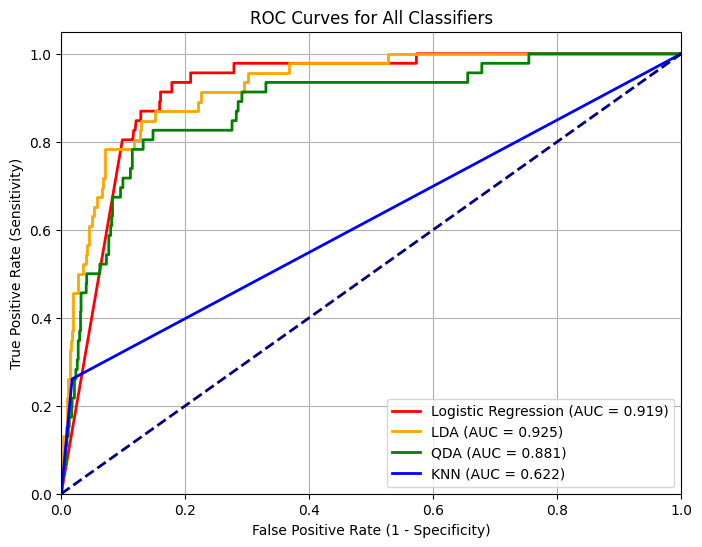

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Each model must provide the *probability* of being in class 1 (bankrupt),
# not just the binary classification (0/1).
# [:, 1] extracts the probability of class "1" from the 2-column output
# (column 0 = P(Y=0), column 1 = P(Y=1)).

# Logistic Regression probabilities
logreg_scores = logreg.predict(x_test_scaled)

# LDA probabilities
lda_scores = model_lda.predict_proba(X_test)[:, 1]

# QDA probabilities
qda_scores = model_qda.predict_proba(X_test)[:, 1]

# KNN probabilities (from the chosen best_k)
knn_scores = knn_final.predict_proba(X_test)[:, 1]
# roc_curve() returns 3 arrays:
#   fpr: False Positive Rate = 1 - specificity
#   tpr: True Positive Rate = sensitivity (recall)
#   thresholds: cutoff values used to classify P(Y=1)

# --- Logistic Regression ---
fpr_log, tpr_log, _ = roc_curve(y_test_array, logreg_scores)
auc_log = auc(fpr_log, tpr_log)

# --- LDA ---
fpr_lda, tpr_lda, _ = roc_curve(y_test_array, lda_scores)
auc_lda = auc(fpr_lda, tpr_lda)

# --- QDA ---
fpr_qda, tpr_qda, _ = roc_curve(y_test_array, qda_scores)
auc_qda = auc(fpr_qda, tpr_qda)

# --- KNN ---
fpr_knn, tpr_knn, _ = roc_curve(y_test_array, knn_scores)
auc_knn = auc(fpr_knn, tpr_knn)
plt.figure(figsize=(8, 6))

# Plot each model’s ROC curve with its AUC value
plt.plot(fpr_log, tpr_log, color='red', lw=2, label=f'Logistic Regression (AUC = {auc_log:.3f})')
plt.plot(fpr_lda, tpr_lda, color='orange', lw=2, label=f'LDA (AUC = {auc_lda:.3f})')
plt.plot(fpr_qda, tpr_qda, color='green', lw=2, label=f'QDA (AUC = {auc_qda:.3f})')
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (AUC = {auc_knn:.3f})')

# Plot the diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves for All Classifiers')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
# The AUC (Area Under the Curve) measures the classifier’s overall ability
# to separate the two classes:
#   - AUC = 1.0 → perfect model
#   - AUC = 0.5 → random guessing
#
# Generally:
#   • Higher AUC = better model performance.
#   • The ROC curve closer to the top-left corner = better classifier.
#
# You can now compare all AUC values printed above to decide which model performs best.
